# Libraries:

In [1]:
import numpy as np
import math
from itertools import combinations
import random
import string
import pandas as pd
import time
import seaborn as sns

This was the very first python assignment I have worked on. Starting with very little prior knowledge of how to use it. Throughout the assignment, several tasks ask to re-use functions writen in previous tasks. However, due to my lack of experience, these were often not generalisable to the more complicated tasks and therefore, I had to rewrite them along the project. Rather than deleting the original functions (which worked for their respective task), I chose to leave them in to illustrate my initial thought processes on how to tackle the problems and demonstrate how my python skills progressed throughout this assignment.

# Task 1

##  Part a)
#### Function that determines the number of ‘1s’ in the binary representation of a positive integer

In [2]:
def f(x):
    print(list(format(x,"b")).count('1'))
    

#### Example

In [3]:
x=7
f(x)

3


## Part b) 
#### Function that determines which bits of the binary representation of a positive integer are ‘1s’.

In [4]:
def g(x):
    y = int(str(format(x,"b")))
    a = np.array([int(i) for i in str(y)])
    print("1's are in positions", np.where(a == 1)[0])


#### Example

In [5]:
test=9
print("binary format" + ":" + format(test,"b"))
g(test)

binary format:1001
1's are in positions [0 3]


## Part c) 
#### Function that gives how many ways are there of organising 2k people into two equal sized teams.

In [6]:
def nbr_combi(k):    
    print((math.factorial(2*k))/(math.factorial(k)*math.factorial(2*k-k)))

#### Example 

In [7]:
x=28
nbr_combi(x)

7648690600760440.0


#### Remark:
This approach is limited by the computers computing power. For x above 28, the computation becomes to expensive and we begin to obtain rounded numbers. For even larger numbers the function simply doesn't work as it is too expensive to obtain any answer. Applying a log transformation would before exponentiating back would allow this function to handle larger imput values. 

## Part d) 
#### Given a list of 2k distinct people, write a function to generate all the possible pairs of teams of size k.

In [8]:
def show_combi(given_list):
    res = list(combinations(given_list, int(len(given_list)/2)))
    print("All possible combinations : " + str(res))
    

#### Example

In [9]:
given_list = [1,2,3,4,5,6,7]
show_combi(given_list)

All possible combinations : [(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 2, 7), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 3, 7), (1, 4, 5), (1, 4, 6), (1, 4, 7), (1, 5, 6), (1, 5, 7), (1, 6, 7), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 3, 7), (2, 4, 5), (2, 4, 6), (2, 4, 7), (2, 5, 6), (2, 5, 7), (2, 6, 7), (3, 4, 5), (3, 4, 6), (3, 4, 7), (3, 5, 6), (3, 5, 7), (3, 6, 7), (4, 5, 6), (4, 5, 7), (4, 6, 7), (5, 6, 7)]


# Task 2

## Part a)
#### What python data structure(s) would you use to represent the two “preference tables” introduced on page 1 ?

 To represent the two “preference tables” introduced on page 1, it would be best to use dataframes or dictionaries.
 These contain a rows/keys index (which can represent the ith Male/Female for the ith row/key) and column/value index (which can represent the ith prefered choices). 

## Part b) 
#### What python data structure(s) would you use to represent a “matching” such as (Aa,Bb,Cc,Dd) as introduced on page 1 ?

  To represent a “matching” such as (Aa,Bb,Cc,Dd) as introduced on page 1, it would be best to use 
  lists. Lists are very readable and easy to modify if needed when implementing the stable marriage matching algorithm.

# Task 3

#### Write a python function which takes two lists of distinct and mutually disjoint symbols (of the same length) and which produces a pair of random preference tables as output.

Creating the two lists

In [10]:
Males = string.ascii_uppercase
Females = string.ascii_lowercase
k=5
Males_letters = random.sample(Males,k)     # where k is the number of Males
Females_letters = random.sample(Females,k) # where k is the number of Femaales

In [11]:
print(Males_letters)
print(Females_letters)

['J', 'T', 'F', 'U', 'P']
['o', 'p', 'k', 'z', 'l']


Creating a function which produces the preference tables based on the lists created above. Here both tables are dataframes (In later task, I will realise that this isn't practical and therefore this will change).

In [12]:
def rand_pref(Males_letters, Females_letters):
    # creating male preference table
    data = []
    for i in range(len(Males_letters)):
        data.append(pd.DataFrame(random.sample(Females_letters, len(Females_letters))).T)
    Males_pref = pd.concat(data)
    Males_pref['Males_letters'] = Males_letters
    
    # creating female preference table
    data = []
    for i in range(len(Females_letters)):
        data.append(pd.DataFrame(random.sample(Males_letters, len(Males_letters))).T)
    Females_pref = pd.concat(data)
    Females_pref['Females_letters'] = Females_letters
    return(Males_pref.set_index('Males_letters'), Females_pref.set_index('Females_letters'))

#### Example

In [13]:
rand_pref(Males_letters, Females_letters)

(               0  1  2  3  4
 Males_letters               
 J              p  k  l  o  z
 T              p  l  z  k  o
 F              k  p  o  z  l
 U              l  o  z  k  p
 P              o  p  l  z  k,
                  0  1  2  3  4
 Females_letters               
 o                J  U  T  F  P
 p                J  F  T  P  U
 k                T  F  J  U  P
 z                J  T  P  F  U
 l                F  J  T  U  P)

In [14]:
Males_pref = rand_pref(Males_letters, Females_letters)[0]
Females_pref = rand_pref(Males_letters, Females_letters)[1]

# Task 4 

#### Write a python function that takes a pair of preference tables and tests if the tables are valid i.e, correspond correctly to each other in terms of dimension and content. The function should return true if they are valid and false otherwise (i.e it is a decision problem).

Three if statements to check validity of tables
1) checks that dimensions are the same

2) checks if the data is of the same type

3) check the preferences of Males/Females are Females/Males that exist and with no duplicates.

In [15]:
def valid_tables(Males_pref, Females_pref):
    if ((Males_pref.shape == Females_pref.shape) and ((Males_pref.dtypes == Females_pref.dtypes).all()) ):
        a=[]
        for i in range(len(Males_pref)):
            x = Males_pref.iloc[i].tolist()
            x.sort()


            y = Females_pref.index.tolist()
            y.sort()
            a.append(x==y) 
    
            x1 = Females_pref.iloc[i].tolist()
            x1.sort()


            y1 = Males_pref.index.tolist()
            y1.sort()
            a.append(x1==y1) 
        if (all(a)):
            return(True)
        else:
            return(False)
    else:
        return(False)        

#### Demonstrate that your function works correctly using example preferences from lecture 1 of Stable Marriage and Its Relation to Other Combinatorial Problems.

In [16]:
ex_male = pd.DataFrame({'1st':['c', 'b', 'b', 'c'], '2nd':['b', 'a', 'd', 'a'], 
                        '3rd':['d', 'c', 'a', 'd'], '4th':['a', 'd', 'c', 'b'], 'ID':['A', 'B', 'C', 'D'] })
ex_female = pd.DataFrame({'1st':['A', 'C', 'C', 'B'], '2nd':['B', 'A', 'B', 'A'], 
                        '3rd':['D', 'D', 'D', 'C'], '4th':['C', 'B', 'A', 'D'], 'ID':['a', 'b', 'c', 'd'] })
ex_male = ex_male.set_index('ID')
ex_female = ex_female.set_index('ID')
display(ex_male, ex_female)
valid_tables(ex_male, ex_female)

,1st,2nd,3rd,4th
ID,,,,
A,c,b,d,a
B,b,a,c,d
C,b,d,a,c
D,c,a,d,b


,1st,2nd,3rd,4th
ID,,,,
a,A,B,D,C
b,C,A,D,B
c,C,B,D,A
d,B,A,C,D


True

#### Example for not valid tables

In [17]:
df1 = pd.DataFrame({'Age':['twentyseven', 'twentyfour', 'twentytwo', 'thirtytwo', 'fifteen']})
df2 = pd.DataFrame({'Age':[27, 24, 22, 32, 15]})
display(df1)
display(df2)
display(valid_tables(df1,df2))

,Age
0,twentyseven
1,twentyfour
2,twentytwo
3,thirtytwo
4,fifteen


,Age
0,27
1,24
2,22
3,32
4,15


False

# Task 5

#### Write a python function that takes a pair of preference tables and a matching, and tests if the given matching is stable with respect to the preference tables. The function should return true if the matching is stable, false otherwise (i.e it is a decision problem).

This function, Sort(), is used to sort a list containing pairs based on the second item of the pair 


In [18]:
def Sort(sub_li): 

    sub_li.sort(key = lambda x: x[1])
    return sub_li

In [19]:
def marriages_stability_status(ex_male, ex_female, matching):
    list_male = ex_male.index.tolist()
    list_female = ex_female.index.tolist()
    a=[]
    for i in range(len(ex_male)):
        for j in range(len(ex_male)):
            male_pref = ex_male.iat[i,j] # replaced by i, j
            male_pref_rank = i           # replaced by j
            list_female_choice = ex_female.iloc[ex_female.index.get_loc(male_pref)].tolist()  
            female_rank_of_male = list_female_choice.index(list_male[i])
            matching.sort()
            male_wife = matching[i][1]# replace 0 by i
            Sort(matching) # this uses the function crreated
            female_husband = matching[list_female.index(male_pref)][0]
            list_male_choice = ex_male.iloc[ex_male.index.get_loc(list_male[i])].tolist() # replace 0 by i
            male_wife_position = list_male_choice.index(male_wife)
            female_husband_position = list_female_choice.index(female_husband)
        
            if ((j >= male_wife_position ) and (female_rank_of_male >= female_husband_position)):
                a.append('Stable')
            else:
                a.append('unstable')

    subset = []
    for word in a:
        if 'Stable' in word:
            subset.append(word)

    if (len(subset)==len(a)):
        return('True:Stable')
        
    else:
        return('False:Unstable, at least one matching is unstable')
        
    
      

#### Demonstrate that your function works correctly using example preferences and matchings from lecture 1 of Stable Marriage and Its Relation to Other Combinatorial Problems.

In [20]:
list_male = ex_male.index.tolist()
list_female = ex_female.index.tolist()
random.shuffle(list_male)
random.shuffle(list_female)

matching = list(zip(list_male, list_female))
list_male = ex_male.index.tolist()
list_female = ex_female.index.tolist()
display(matching)

[('A', 'd'), ('C', 'b'), ('D', 'c'), ('B', 'a')]

In [21]:
marriages_stability_status(ex_male, ex_female, matching)

'False:Unstable, at least one matching is unstable'

# Task 6

#### Write a function that takes a pair of preference tables and a matching, and which scores the matching for both men and women. The function should return the two scores. The scores are the sum of the ranked preferences of the pairings for each group (male / female) in the matching.

In [22]:
def ranking_score_by_sexes(ex_male, ex_female, matching):
    list_male = ex_male.index.tolist()
    list_female = ex_female.index.tolist()
    male_score=[]
    female_score=[]
    for i in range(len(ex_male)):
        matching.sort()
        male_wife = matching[i][1] # first zero by i
        list_male_choice = ex_male.iloc[ex_male.index.get_loc(list_male[i])].tolist() # first zero by i
        male_wife_position = list_male_choice.index(male_wife)
        male_score.append(male_wife_position)
        
        Sort(matching)
        female_husband = matching[i][0] # first zero by i
        list_female_choice = ex_female.iloc[ex_female.index.get_loc(list_female[i])].tolist()  # first zero by i
        female_husband_position = list_female_choice.index(female_husband) 
        female_score.append(female_husband_position)
     
    male_score = sum(male_score)
    female_score = sum(female_score)
    return('Male Score:',male_score, 'Female Score:',female_score)
    
            

#### example

In [23]:
ranking_score_by_sexes(ex_male, ex_female, matching)


('Male Score:', 3, 'Female Score:', 4)

# Task 7

## Part a)

#### Explain how you could include the “very undesirable” imaginary man introduced on page 9 into your representation of the preference tables.

The "very undesirable" man can be included by the addition of an extra column at the end of the females' preference table.
The column would consist of the same letter "omega" representing the "very undesirable" man.

## Part b

#### Implement the fundamental algorithm described on page 9 as a Python function. Your function should take a (compatible) pair of preference tables as input and produce a (stable) matching as an output.

In [24]:
ex_male ={'A':['c', 'b', 'd', 'a'], 'B':['b', 'a', 'c', 'd'], 
                        'C':['b', 'd', 'a', 'c'], 'D':['c', 'a', 'd', 'b']}
ex_female = pd.DataFrame({'1st':['A', 'C', 'C', 'B'], '2nd':['B', 'A', 'B', 'A'], 
                        '3rd':['D', 'D', 'D', 'C'], '4th':['C', 'B', 'A', 'D'], 'Omega':['Om', 'Om', 'Om', 'Om'], 'ID':['a', 'b', 'c', 'd'] })

ex_female = ex_female.set_index('ID')
display(ex_male, ex_female)

{'A': ['c', 'b', 'd', 'a'],
 'B': ['b', 'a', 'c', 'd'],
 'C': ['b', 'd', 'a', 'c'],
 'D': ['c', 'a', 'd', 'b']}

,1st,2nd,3rd,4th,Omega
ID,,,,,
a,A,B,D,C,Om
b,C,A,D,B,Om
c,C,B,D,A,Om
d,B,A,C,D,Om


In [25]:
def finding_stable_matching(ex_male, ex_female):
    list_male = list(ex_male.keys())
    k=0                         # initialising the number of couples formed
    n=len(list_male)            # number of men = number of women
    omega = 'Om'                 # the very undesirable men
    matching = [(omega, 'a'), (omega, 'b'), (omega, 'c'), (omega, 'd')]
    while (k<n):
        X = list_male[k]        # the current suitor
        while (X!=omega):       
            x = ex_male[X][0]     # prefered choice on current male's list   
            x_couple = [element for element in matching if element[1] == x] # couple of current male's prefered choice
            x_fiance =  x_couple[0][0]                                      # male with whom current male's prefered choice is coupled currently
            list_of_x_choice = ex_female.iloc[ex_female.index.get_loc(x)].tolist()  # obtain a list of preference for current male's preferred choice
            current_male_position_in_x = list_of_x_choice.index(X)
            current_partner_position_in_x = list_of_x_choice.index(x_fiance)
            if (current_male_position_in_x < current_partner_position_in_x):
                x_couple_list = list(x_couple[0])
                x_couple_list[0] = X
                x_couple = tuple(x_couple_list)
                matching = [x_couple if e[1] == x_couple[1] else e for e in matching]
                X = x_fiance

            if (X!=omega):
                ex_male[X].remove(x)
        k = k+1

    return(matching)

In [26]:
finding_stable_matching(ex_male, ex_female)

[('B', 'a'), ('C', 'b'), ('D', 'c'), ('A', 'd')]

# Task 8

#### Determine how the execution time of your implementation of the fundamental algorithm varies with the size of the preference table. Is this relationship consistent with your expectations ? Justify your reasoning with reference to your implementation of the algorithm and your experimental observations.

#### The Code 

In [27]:
times=[]
number_of_couples=[]
functonal_data = []

In [28]:
def rand_pref(Males_letters, Females_letters):
    Males_pref = {}
    for i in range(len(Males_letters)):
        Males_pref[Males_letters[i]] = random.sample(Females_letters, len(Females_letters))
    
    # creating female preference table
    data = []
    for i in range(len(Females_letters)):
        data.append(pd.DataFrame(random.sample(Males_letters, len(Males_letters))).T)
    
    Females_pref = pd.concat(data)
    Females_pref['Females_letters'] = Females_letters
    x = np.array(["Om"])
    omega_list = np.repeat(x, [len(Males_letters)], axis=0)
    ex_female = Females_pref.assign(Omega=omega_list)
    
    return(Males_pref, ex_female.set_index('Females_letters'))

In [29]:
def finding_stable_matching(ex_male, ex_female):
    list_male = list(ex_male.keys())
    k=0                         # initialising the number of couples formed
    n=len(list_male)            # number of men = number of women
    omega='Om'
    matching = []
    for i in range(len(Females_letters)):
        matching.append(("Om", Females_letters[i]))
   
    while (k<n):
        X = list_male[k]        # the current suitor
        while (X!=omega):       
            x = ex_male[X][0]     # prefered choice on current male's list   
            x_couple = [element for element in matching if element[1] == x] # couple of current male's prefered choice
            x_fiance =  x_couple[0][0]                                      # male with whom current male's prefered choice is coupled currently
            list_of_x_choice = ex_female.iloc[ex_female.index.get_loc(x)].tolist()  # obtain a list of preference for current male's preferred choice
            current_male_position_in_x = list_of_x_choice.index(X)
            current_partner_position_in_x = list_of_x_choice.index(x_fiance)
            if (current_male_position_in_x < current_partner_position_in_x):
                x_couple_list = list(x_couple[0])
                x_couple_list[0] = X
                x_couple = tuple(x_couple_list)
                matching = [x_couple if e[1] == x_couple[1] else e for e in matching]
                X = x_fiance

            if (X!=omega):
                ex_male[X].remove(x)
        k = k+1

    return(matching)

In [30]:
for p in range(20):
    times=[]
    number_of_couples=[]
    for j in [4,8,12,25,50,100,200]:
        Males = ['A{}'.format(i) for i in range(1, 1000)]
        Females = ['a{}'.format(i) for i in range(1, 1000)]
        Males_letters = random.sample(Males,k=j)     # where k is the number of Males
        Females_letters = random.sample(Females,k=j) # where k is the number of Femaales

        rand_pref(Males_letters, Females_letters)

        ex_male = rand_pref(Males_letters, Females_letters)[0]
        ex_female = rand_pref(Males_letters, Females_letters)[1]

        start = time.perf_counter()
        finding_stable_matching(ex_male, ex_female)
        end = time.perf_counter() 

        times.append(end-start)
        number_of_couples.append(j)
    if (p==0):
        functonal_data = pd.DataFrame(times, number_of_couples)
    else:   
        functonal_data[p] = times


In [31]:
display(functonal_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
4,0.000367,0.000529,0.000585,0.000946,0.000539,0.000571,0.000590,0.000604,0.000397,0.000399,0.000484,0.000455,0.000416,0.000391,0.000583,0.000395,0.000547,0.000641,0.000525,0.000538
8,0.001152,0.001569,0.000976,0.001471,0.000973,0.001571,0.001700,0.001595,0.001511,0.001903,0.001019,0.001263,0.001809,0.001103,0.000633,0.001576,0.001477,0.001343,0.000733,0.001128
12,0.002075,0.002120,0.001665,0.003410,0.002019,0.002205,0.002159,0.004416,0.001815,0.003826,0.002873,0.002427,0.001458,0.003472,0.002282,0.001904,0.002547,0.002908,0.001187,0.002035
25,0.015592,0.012508,0.005559,0.008668,0.008058,0.006161,0.010830,0.010050,0.008710,0.007635,0.008113,0.007264,0.008408,0.010845,0.007050,0.005510,0.012652,0.007277,0.008293,0.007264
50,0.028671,0.045988,0.025011,0.034454,0.038847,0.035441,0.030995,0.023571,0.031376,0.031738,0.031494,0.038089,0.027615,0.021054,0.029347,0.022417,0.026104,0.035955,0.021964,0.024132
100,0.144502,0.111380,0.153376,0.141138,0.186780,0.116257,0.089740,0.153193,0.124567,0.105115,0.103214,0.096979,0.118253,0.101824,0.088244,0.105857,0.110420,0.154355,0.180490,0.126553
200,0.469053,0.556909,0.549097,0.551923,0.419981,0.468554,0.710836,0.483091,0.748546,0.647762,0.532307,0.648717,0.587077,0.458524,0.293991,0.607589,0.687015,0.309855,0.519899,0.510520


20 curves of computation time vs number of couples.
For number of couples = 4, 8, 12, 25, 50, 100 and 200. 

[Text(0.5, 0, 'Number of couples'),
 Text(0, 0.5, 'Computation time in seconds')]

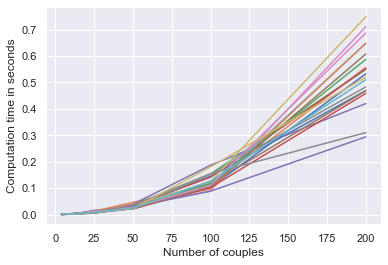

In [32]:
sns.set()
ax = functonal_data.plot(legend=False)
ax.set(xlabel='Number of couples',  ylabel='Computation time in seconds')

# Task 9

#### Examine how the score for of stable matchings obtained using the fundamental algorithm are distributed for randomised preference tables. Discuss and summarise your findings.

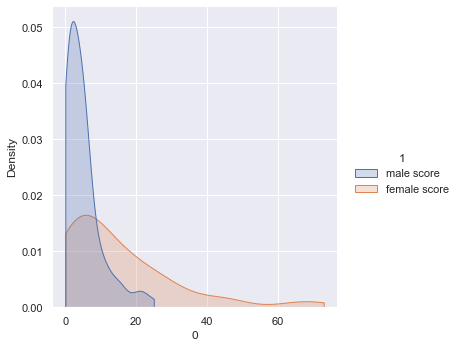

In [33]:

Males = ['A{}'.format(i) for i in range(1, 1001)]
Females = ['a{}'.format(i) for i in range(1, 1001)]
Males_letters = random.sample(Males,k=100)     # where k is the number of Males
Females_letters = random.sample(Females,k=100) # where k is the number of Femaales


random.seed(420)
ex_male = rand_pref(Males_letters, Females_letters)[0]
ex_female = rand_pref(Males_letters, Females_letters)[1]


stable_list = finding_stable_matching(ex_male, ex_female)

random.seed(420)
ex_male = rand_pref(Males_letters, Females_letters)[0]
ex_female = rand_pref(Males_letters, Females_letters)[1]

male_partners_scores = []
female_partners_scores =[]

for i in range(len(stable_list)):
    male = stable_list[i][0]     # prefered choice on current male's list   
    female= stable_list[i][1] 
    
    male_partners_scores.append(ex_male[male].index(female))

    list_of_x_choice = ex_female.iloc[ex_female.index.get_loc(female)].tolist() 
    female_partners_scores.append(list_of_x_choice.index(male))
    

partners_scores2 = pd.DataFrame(male_partners_scores +female_partners_scores)

category_list = np.repeat(('male score', 'female score') , [len(male_partners_scores), len(female_partners_scores)], axis=0)

partners_scores2[1] = category_list


sns.displot(partners_scores2, x=0, hue=1, kind="kde", fill=True, cut=0)

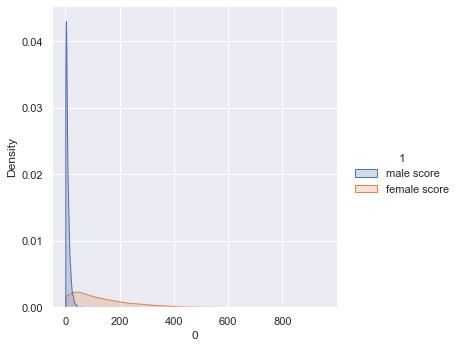

In [34]:

Males = ['A{}'.format(i) for i in range(1, 1001)]
Females = ['a{}'.format(i) for i in range(1, 1001)]
Males_letters = random.sample(Males,k=1000)     # where k is the number of Males
Females_letters = random.sample(Females,k=1000) # where k is the number of Femaales


random.seed(420)
ex_male = rand_pref(Males_letters, Females_letters)[0]
ex_female = rand_pref(Males_letters, Females_letters)[1]


stable_list = finding_stable_matching(ex_male, ex_female)

random.seed(420)
ex_male = rand_pref(Males_letters, Females_letters)[0]
ex_female = rand_pref(Males_letters, Females_letters)[1]

male_partners_scores = []
female_partners_scores =[]

for i in range(len(stable_list)):
    male = stable_list[i][0]     # prefered choice on current male's list   
    female= stable_list[i][1] 
    
    male_partners_scores.append(ex_male[male].index(female))

    list_of_x_choice = ex_female.iloc[ex_female.index.get_loc(female)].tolist() 
    female_partners_scores.append(list_of_x_choice.index(male))
    

partners_scores2 = pd.DataFrame(male_partners_scores +female_partners_scores)

category_list = np.repeat(('male score', 'female score') , [len(male_partners_scores), len(female_partners_scores)], axis=0)

partners_scores2[1] = category_list


sns.displot(partners_scores2, x=0, hue=1, kind="kde", fill=True, cut=0)

The density plots above represent the sampled preference scores associated with the allocated partner obtained from the stable marriage algorithm written in Task 7. The blue density represents the males' scores and the orange density the females'. From the first first density plot, it is clear that the algorithm prioritises the males' preferences. This is illustrated by the blue density having a shorter tail and a much higher right-skewed peak. Meanwhile, the females' density has a much higher variance. 

When increasing the number of couples, this difference is accentuated. The second density plot illustrates this. Here 1000 couples were formed and males' density of preference scores are very highly right-skewed and the females' has a very long and fat tail.


# Task 10: The 5 Rs (Benureau and Rougier)


### Re-runnable (R1)

This represents the idea that in the future, our code will work because we are using up-to-date functions. For example, here making sure the functions we use are from the latest python version. Throughout this project, this was done to the best of my belief.

### Repeatable (R2)

This ensures that when we re-run our code all of it produces the same results. This can be achieved by setting seeds, which needs to be done after testing a couple different seeds to ensure the one chosen isn't producing results that are very rare cases of what we want to produce. This was done throughout this project, where appropriate. 

Additionally, produced data can be saved in a file and checked to ensure we obtain the same data after repeating the project. However, this was not necessary here.

### Reproducible (R3)

The underlying issue here is that the sequence of numbers produced by setting seeds might change from version to version. Therefore, we risk obtaining different results even if we are using the same code, with the same seeds. This issue is also true for functions, used in the code. Therefore, there should be some indication as to what version of python was used, what version of packages etc...
One way to deal with the seed issue is to save the sequence used from the settled seed and then the next person using our code can check if the seed is producing the same sequence of numbers. We can check ourselves for this using Unit testing.

### Reusable (R4)

This focuses on making our code easy to use for ourselves in the future and other people. Annotations about the decisions that were made while writing the code give an insight as to what we were thinking while writing it. This helps understanding the code and explain why certain decisions were made. Making it much easier for anyone to use our code. Another aspect of reusability is about sharing our code. Uploading it to GitHub for example enables other people to access it easily and might even have the additional benefit of someone spotting a mistake in our work. Finally, another easy way to make our code reusable is by avoiding "magic numbers", this was applied throughout this project. 

### Replicable (R5)

This is more about the article or description that supports the code and project. The idea is that we want to ensure that what we are doing is very clear. All the little details that might seem too much, might actually ensure that if someone reads the description alone, they can write their own code and produce the same results. 